In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import env

import warnings
warnings.filterwarnings('ignore')

In [2]:
def acquire_zillow():
    if os.path.exists('zillow_2017.csv'):
        return pd.read_csv('zillow_2017.csv', index_col=0)
    else:
        ''' Acquire data from Zillow using env imports and rename columns'''

        url = f"mysql+pymysql://{user}:{password}@{host}/zillow"

        query = """
        SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
        FROM properties_2017
        LEFT JOIN propertylandusetype USING(propertylandusetypeid)
        WHERE propertylandusedesc IN ("Single Family Residential",                       
                                      "Inferred Single Family Residential")"""

        df = pd.read_sql(query, url)


        df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                                  'bathroomcnt':'bathrooms', 
                                  'calculatedfinishedsquarefeet':'area',
                                  'taxvaluedollarcnt':'tax_value', 
                                  'yearbuilt':'year_built',})
        return df

In [18]:
zillow = acquire_zillow().reset_index().fillna(0)

In [19]:
zillow

,bedrooms,bathrooms,square_feet,tax_value,year_built,taxamount,fips
0,0.0,0.0,0.0,27516.0,0.0,0.00,6037.0
1,0.0,0.0,0.0,10.0,0.0,0.00,6037.0
2,0.0,0.0,0.0,10.0,0.0,0.00,6037.0
3,0.0,0.0,0.0,2108.0,0.0,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152859,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152860,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,0.0,0.0,0.0,208057.0,0.0,5783.88,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [20]:
zillow.fips.nunique()

3

<AxesSubplot:xlabel='taxamount', ylabel='fips'>

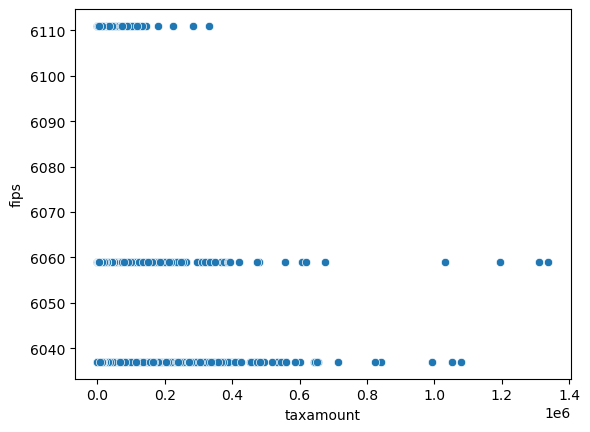

In [34]:
sns.scatterplot(data=zillow, x='taxamount', y='fips')

<AxesSubplot:xlabel='fips', ylabel='taxamount'>

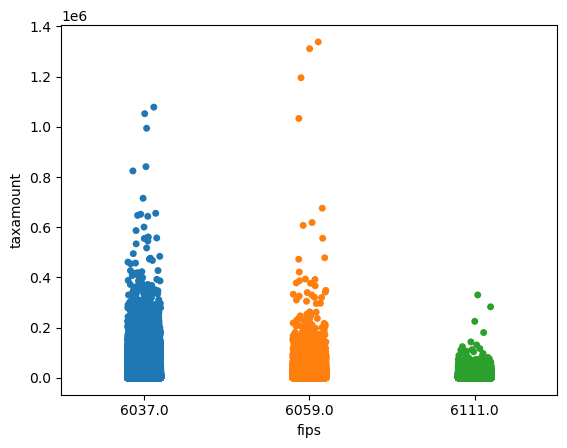

In [33]:
sns.stripplot(data=zillow, x='fips',y='taxamount')
#Which FIP has the highest tax amount

<AxesSubplot:xlabel='fips', ylabel='bedrooms'>

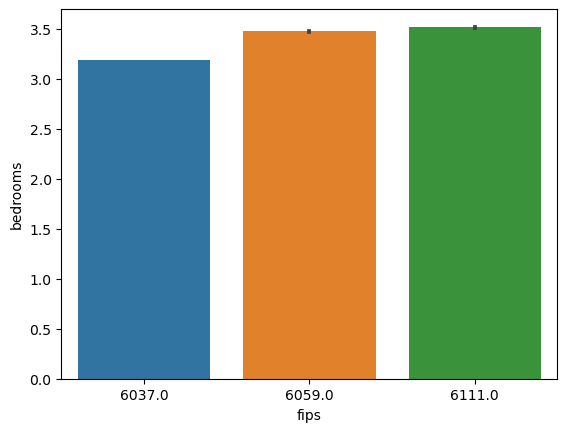

In [39]:
sns.barplot(data=zillow, x='fips',y='bedrooms')
#Which has the most bedrooms

<AxesSubplot:xlabel='fips', ylabel='bathrooms'>

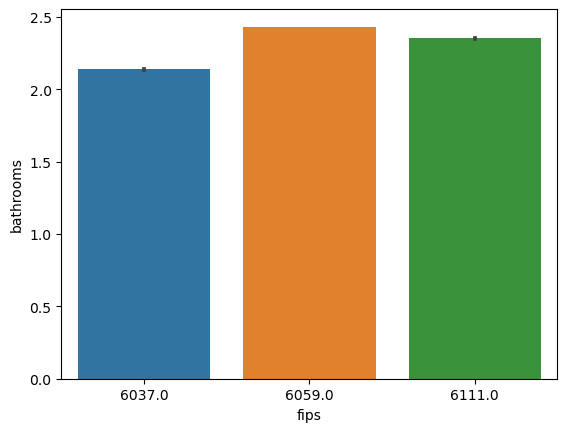

In [40]:
sns.barplot(data=zillow, x='fips',y='bathrooms')
#Which has the most bathrooms

<AxesSubplot:xlabel='fips', ylabel='square_feet'>

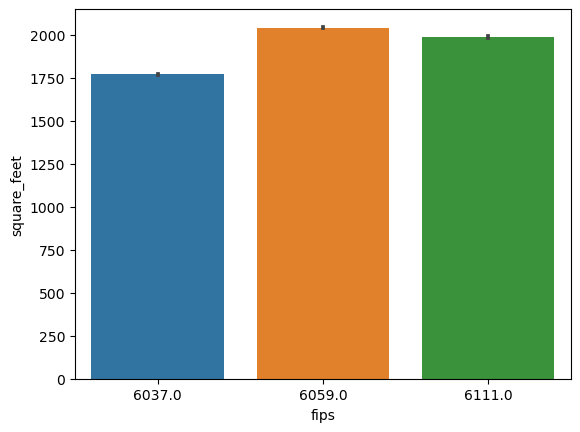

In [48]:
sns.barplot(data=zillow, x='fips',y='square_feet')
#Which has the most square feet?